# Portfolio Part 4 - Analysis of Coffee Quality Data (CQI May-2023)

The explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
| Unnamed: 0           | An auto-generated index or unique identifier for each entry in the dataset.                                  |
| ID                   | A unique identifier assigned to each coffee sample.                                                          |
| Country of Origin    | The country where the coffee beans were grown.                                                               |
| Farm Name            | The name of the farm where the coffee was produced.                                                          |
| Lot Number           | A batch number assigned to a particular lot of coffee beans.                                                 |
| Mill                 | The facility where the coffee beans were processed.                                                          |
| ICO Number           | The identification number assigned by the International Coffee Organization.                                 |
| Company              | The company that owns or markets the coffee.                                                                 |
| Altitude             | The elevation at which the coffee farm is located, typically measured in meters or feet.                     |
| Region               | The specific area within the country where the coffee is grown.                                               |
| Producer             | The name of the individual or company that produced the coffee.                                               |
| Number of Bags       | The number of bags that the coffee lot contains.                                                             |
| Bag Weight           | The weight of each bag, usually given in kilograms or pounds.                                                |
| In-Country Partner   | The local partner or organization associated with the coffee.                                                 |
| Harvest Year         | The year in which the coffee was harvested.                                                                  |
| Grading Date         | The date on which the coffee was graded or assessed for quality.                                              |
| Owner                | The owner of the coffee at the time of grading.                                                              |
| Variety              | The specific variety or species of the coffee plant.                                                         |
| Status               | The current status of the coffee (e.g., active, inactive).                                                    |
| Processing Method    | The method used to process the coffee beans, such as washed, dry, or honey.                                  |
| Aroma                | Refers to the scent or fragrance of the coffee.                                                              |
| Flavor               | The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.         |
| Aftertaste           | Refers to the lingering taste that remains in the mouth after swallowing the coffee.                                    |
| Acidity              | Acidity in coffee refers to the brightness or liveliness of the taste.                |
| Body                 | The body of coffee refers to the thickness or viscosity of the coffee in the mouth.                    |
| Balance              | Balance refers to how well the different flavor components of the coffee work together.                                |
| Uniformity           | Uniformity refers to the consistency of the coffee from cup to cup.                                 |
| Clean Cup            | A clean cup refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.                        |
| Sweetness            | It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee.                                                             |
| Overall              | An overall score that represents the general quality of the coffee.                                           |
| Defects              | The number of defects found in the coffee sample.                                                            |
| Total Cup Points     | The total score awarded to the coffee based on various sensory evaluations.                                  |
| Moisture Percentage  | The amount of moisture present in the coffee, typically expressed as a percentage.                           |
| Category One Defects | Major defects observed in the coffee samples.                                                                |
| Quakers              | A term used to describe underdeveloped or poorly roasted beans that appear lighter in color.                 |
| Color                | The color of the roasted beans, which can indicate the roast level.                                          |
| Category Two Defects | Minor defects observed in the coffee samples.                                                                |
| Expiration           | The date after which the coffee is considered to be less optimal for use.                                    |
| Certification Body   | The organization that certified the coffee, if applicable.                                                    |
| Certification Address| The address of the certification body.                                                                       |
| Certification Contact| Contact information for the certification body.                                                               |


For the sensory evaluations (coffee quality scores), the assessment depends on 9 factors: Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, and Sweetness. The 'Total Cup Points' result is literally the total of the 9 features mentioned above.

In this notebook, we will explore the 'Coffee Quality Data (CQI May-2023)' data through several key steps:
1. ***Explore the data*** We will begin by visualizing interesting aspects of the data, such as identifying the best coffee based on mean values and other relevant insights.
2. ***Data preparation*** This step involves preparing the data for analysis. We will demonstrate how we handle the dataset by deciding to drop unnecessary columns and encode categorical variables into numeric values for further analysis
3. ***Study the correlation*** Next, we will examine the correlation between the 'Coffee quality scores' and other features in the dataset. We will select the variables that we believe are most helpful for predicting the quality scores.
4. ***Split the dataset*** We will split the dataset into training and testing sets, following a ratio of 80:20, where 80% of the data will be used for training the model and 20% for testing its performance.
5. ***Train a linear regression model*** A modeling technique will be applied to predict the focus target variable. Further details on the specific analysis and modeling technique for predicting 'Flavour' will be discussed in subsequent sections.
6. ***Model Evaluation using Cross-Validation*** This step involves evaluating the performance of our trained model using cross-validation. Cross-validation helps to assess how well the model generalizes to new data by splitting the dataset into multiple subsets and training the model on different combinations of these subsets.

# (1) Explore the data


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Define function to bold text
def bold_text(text):
    return "\033[1m" + text + "\033[0m"

# Initialize scaler and encoders
label_Encoder = LabelEncoder()


In [24]:
# Import the dataset from a CSV file
original_dataset = pd.read_csv('df_arabica_clean.csv')

# Display the first few rows of the dataset to understand its structure
print(bold_text("First few rows of the dataset:"))
original_dataset.head()

First few rows of the dataset:


,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [25]:
# Display all the columns in this data set
print(original_dataset.keys())

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


In [26]:
print(bold_text("Statistical summary of the dataset:"))
original_dataset.describe()

Statistical summary of the dataset:


,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


In [27]:
#check if there any null values in data set

nan_values = original_dataset.isnull().sum()
nan_count = original_dataset.isnull().sum().sum()
original_dataset_length = len(original_dataset)
print(bold_text('Original Dataset Row Count:'), original_dataset_length)
print(bold_text('Total of NaN values:'), nan_count)

# Display NaN values per column for detailed analysis
print("NaN Value")
nan_values

Original Dataset Row Count: 207
Total of NaN values: 153
NaN Value


Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

<strong>As shown above, the "ICO Number" column contains 132 null values, which are too many and difficult to handle. Therefore, the author chose to drop the column because it will not be used for analysis.</strong>

In [28]:
# Since the columns that impact coffee quality do not contain null values,
# the author decided to determine the optimal coffee combination using mean values.

quality_factors = ['Flavor', 'Aroma', 'Aftertaste', 'Acidity', 'Body', 'Balance',
                   'Uniformity', 'Sweetness', 'Overall']

# Calculate the average quality score for each row in the dataset
original_dataset['Average Quality Score'] = original_dataset[quality_factors].mean(axis=1)

# Identify the row with the highest average quality score
highest_score_row = original_dataset.loc[original_dataset['Average Quality Score'].idxmax()]

# Extract details of the coffee with the highest score
top_coffee_details = highest_score_row[['Company', 'Variety', 'Country of Origin', 'Farm Name', 'Processing Method']]

# Display the details of the best coffee combination
print(bold_text("Best Coffee Combination:"))
print(bold_text("Company:"), top_coffee_details['Company'])
print(bold_text("Variety:"), top_coffee_details['Variety'])
print(bold_text("Country of Origin:"), top_coffee_details['Country of Origin'])
print(bold_text("Farm Name:"), top_coffee_details['Farm Name'])
print(bold_text("Processing Method:"), top_coffee_details['Processing Method'])


Best Coffee Combination:
Company: Coffee Quality Union
Variety: Castillo
Country of Origin: Colombia
Farm Name: Finca El Paraiso
Processing Method: Double Anaerobic Washed


## Data Visualization Overview

Before diving into the visual analysis, it's important to outline the preprocessing steps taken to ensure the integrity and relevance of the data presented. The dataset underwent careful cleaning where irrelevant or incomplete data entries were removed. This process was essential to focus on the most impactful variables that influence coffee quality.

The visualizations that follow aim to unearth patterns and insights from the curated dataset, focusing on aspects such as farm distribution by country, top coffee producers, and the correlation between various coffee quality attributes. These visuals not only enhance our understanding of the data at a glance but also aid in making informed decisions and predictions about coffee quality. Here are the detailed visualizations based on the refined dataset:


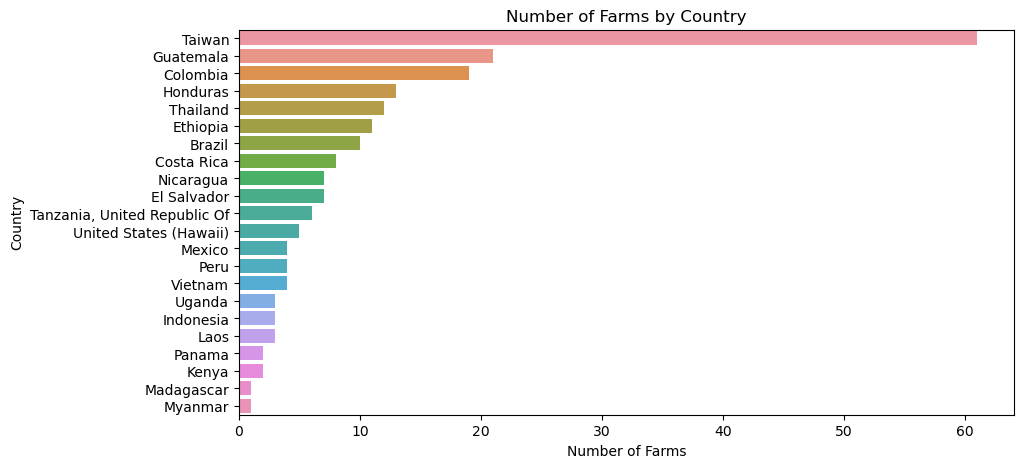

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=original_dataset, y='Country of Origin', order=original_dataset['Country of Origin'].value_counts().index)
plt.xlabel('Number of Farms')
plt.ylabel('Country')
plt.title('Number of Farms by Country')
plt.show()

This bar graph displays the number of coffee farms in various countries. <strong>Taiwan has the highest number of farms</strong> , shown by the longest bar, followed by Guatemala and Colombia. The bars represent the number of farms in descending order, with countries like Myanmar and Madagascar having the fewest. This visualization helps us understand where coffee production is most concentrated globally by showing the number of farms per country.

In [47]:
# Counting the number of farms for each producer
farm_count_by_producer = original_dataset['Producer'].value_counts().reset_index()
farm_count_by_producer.columns = ['Producer', 'Number of Farms']

# Sorting the producers by the number of farms, descending
sorted_farm_counts = farm_count_by_producer.sort_values('Number of Farms', ascending=False)

# Selecting the top 20 producers
top_20_producers = sorted_farm_counts.head(20)

# Creating a bar chart for the top 20 producers
bar_chart = px.bar(top_20_producers, x='Producer', y='Number of Farms',
                   title='Top Coffee Producers', labels={'Number of Farms': 'Number of Farms'})

bar_chart.show()

# Creating a sunburst chart for the top 20 producers
sunburst_chart = px.sunburst(top_20_producers, path=['Producer'], values='Number of Farms',
                             title='Distribution Among Top Coffee Producers')

sunburst_chart.show()

This bar graph illustrates the number of farms associated with the top coffee producers. The producer with the highest number of farms is <strong>Doi Tung Development Project</strong>, followed by several other producers each with fewer farms. The chart provides a clear view of how many farms each top producer manages, showing a range from seven to one farm. This visual helps identify the major players in the coffee production industry based on their farm count

In [31]:
# Calculate the average 'Total Cup Points' for each country
average_cup_points_by_country = original_dataset.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# Add a column to the original dataset that counts the number of occurrences for each country
original_dataset['Country Frequency'] = original_dataset.groupby('Country of Origin')['Country of Origin'].transform('count')

# Display the calculated average cup points and the frequency data
average_cup_points_by_country, original_dataset['Country Frequency']


(               Country of Origin  Total Cup Points
 0                         Brazil         81.883000
 1                       Colombia         83.877368
 2                     Costa Rica         83.740000
 3                    El Salvador         81.532857
 4                       Ethiopia         84.960909
 5                      Guatemala         84.301429
 6                       Honduras         83.282308
 7                      Indonesia         83.693333
 8                          Kenya         83.710000
 9                           Laos         83.390000
 10                    Madagascar         84.250000
 11                        Mexico         82.710000
 12                       Myanmar         83.670000
 13                     Nicaragua         81.892857
 14                        Panama         83.625000
 15                          Peru         82.332500
 16                        Taiwan         84.350328
 17  Tanzania, United Republic Of         84.735000
 18         

This output provides a detailed breakdown of two important aspects of the coffee dataset: the average quality of coffee from different countries, and the number of entries per country.

<strong>The first part</strong> of the output shows the average 'Total Cup Points' for each country of origin, reflecting the quality scores attributed to coffee samples. For example, Brazil's coffee has an average score of approximately 81.88, while Ethiopia, known for its high-quality beans, averages around 84.96. This gives an indication of the perceived quality of coffee from these countries based on the dataset.

<strong>The second part</strong> lists the frequency of entries from each country in the dataset, highlighting how many times coffee from each country has been evaluated. Colombia, for example, has a significantly higher number of evaluations with 61 entries, compared to Costa Rica with only 3. This frequency data helps in understanding the representation of each country within the dataset, which can influence the statistical significance of the average quality scores and might reflect the focus areas of the data collection efforts.

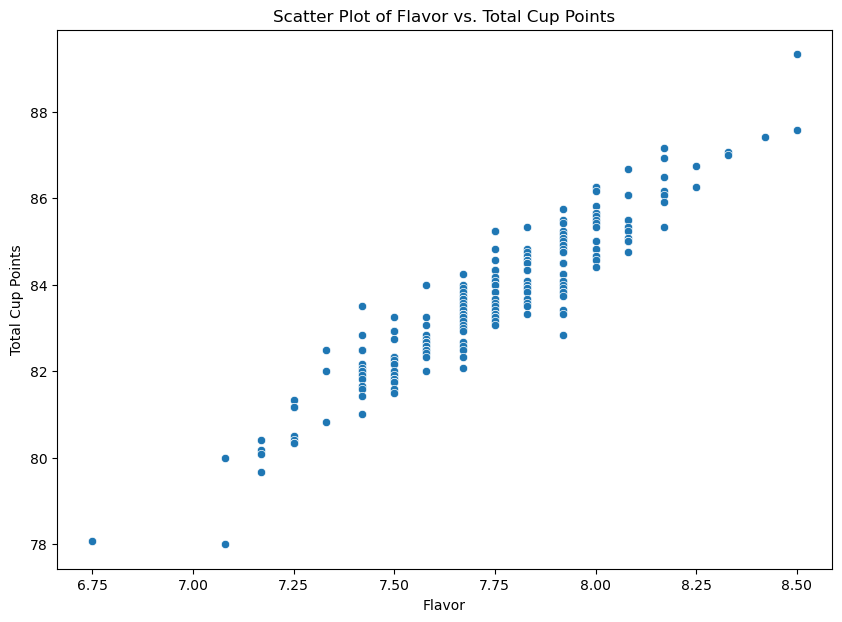

In [32]:
# Let's display the relationship between 'Flavor' and 'Total Cup Points'
plt.figure(figsize=(10, 7))  # Setting the figure size

# Creating a scatter plot to visualize the data
sns.scatterplot(data=original_dataset, x='Flavor', y='Total Cup Points')
plt.xlabel('Flavor')  # Label for the x-axis
plt.ylabel('Total Cup Points')  # Label for the y-axis
plt.title('Scatter Plot of Flavor vs. Total Cup Points')  # Adding a title to the plot
plt.show()  # Displaying the plot

This scatter plot illustrates the relationship between the 'Flavor' scores and 'Total Cup Points' of coffee samples. Each point on the plot represents a coffee sample, with the 'Flavor' score on the x-axis and the 'Total Cup Points' on the y-axis. <strong>The graph shows a clear upward trend</strong>, indicating that higher 'Flavor' scores are generally associated with higher 'Total Cup Points'. This suggests that the flavor of the coffee significantly impacts its overall quality assessment. The clustering of points towards higher flavor scores above 8.0 also indicates that higher-quality coffees tend to score well in terms of flavor.

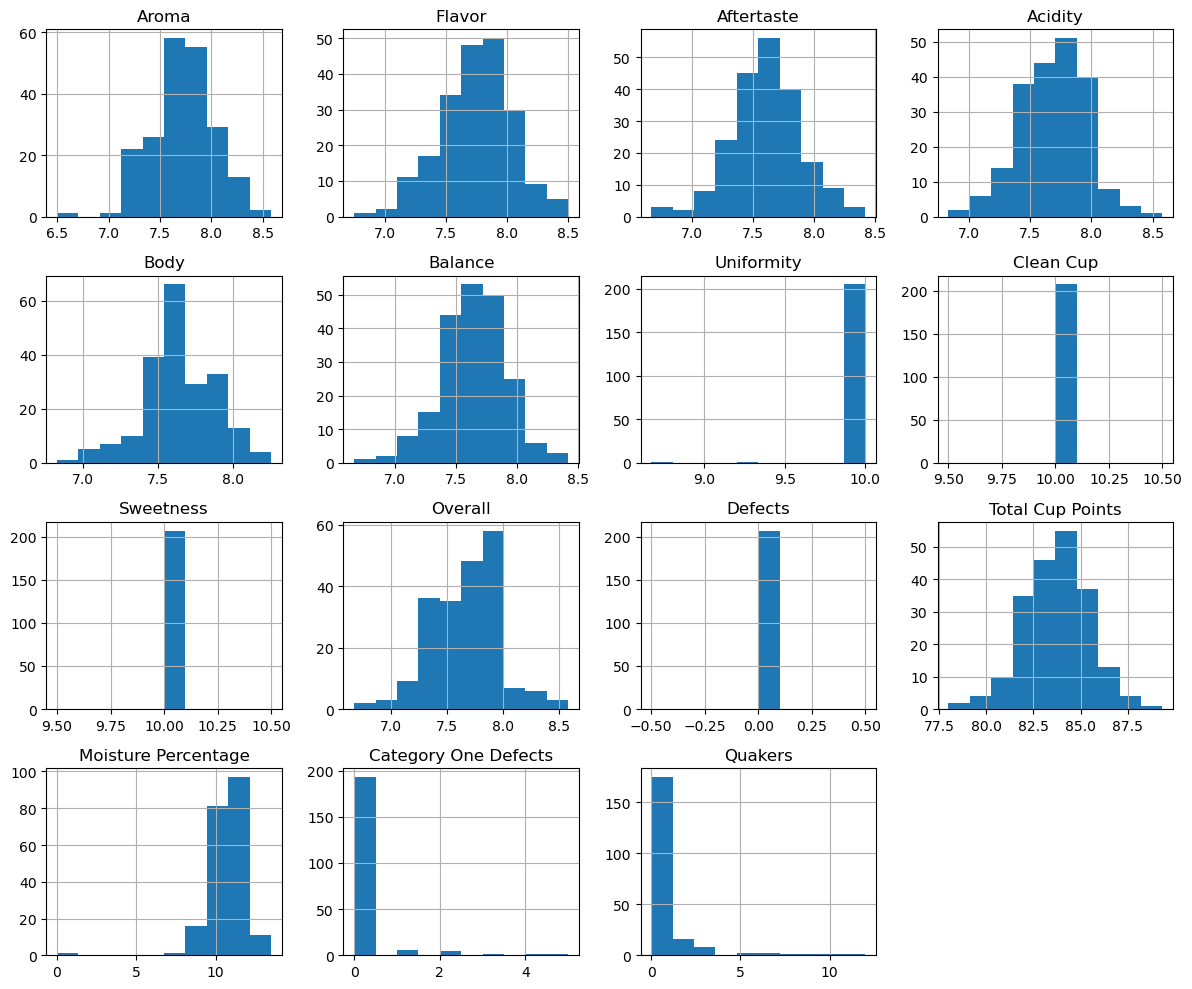

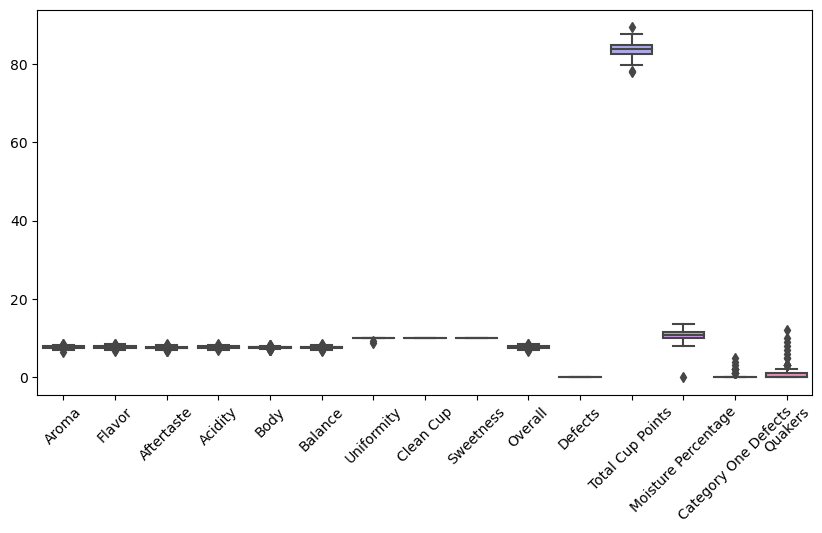

In [33]:
# Define the variables for the analysis
quality_attributes = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
    'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points',
    'Moisture Percentage', 'Category One Defects', 'Quakers'
]

# Generate histograms for each attribute to visualize distribution
original_dataset[quality_attributes].hist(bins=10, figsize=(12, 10))
plt.tight_layout()  # Adjust layout to make room for all subplots
plt.show()  # Display the histograms

# Create a boxplot for each attribute to visualize data spread and outliers
plt.figure(figsize=(10, 5))  # Set figure size for the boxplots
sns.boxplot(data=original_dataset[quality_attributes])  # Create boxplots
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the boxplots


These charts show the distribution and range of different coffee quality attributes in our dataset.

<strong>Histograms</strong>:
Each histogram represents how often scores appear for attributes like Aroma, Flavor, and Body. They show us which scores are most common. For example, most coffees have high scores for Clean Cup and Uniformity, showing that these qualities are usually good.

<strong>Boxplots</strong>:
The boxplots provide a quick look at the range of scores for the same attributes. They highlight the median scores and show where most of the data lies, which helps us spot unusual values or outliers. For instance, the boxplot for Quakers shows a few extreme values, which are rare cases in the dataset.

These visual tools help us understand where most of the coffee qualities score and identify any unusual data.

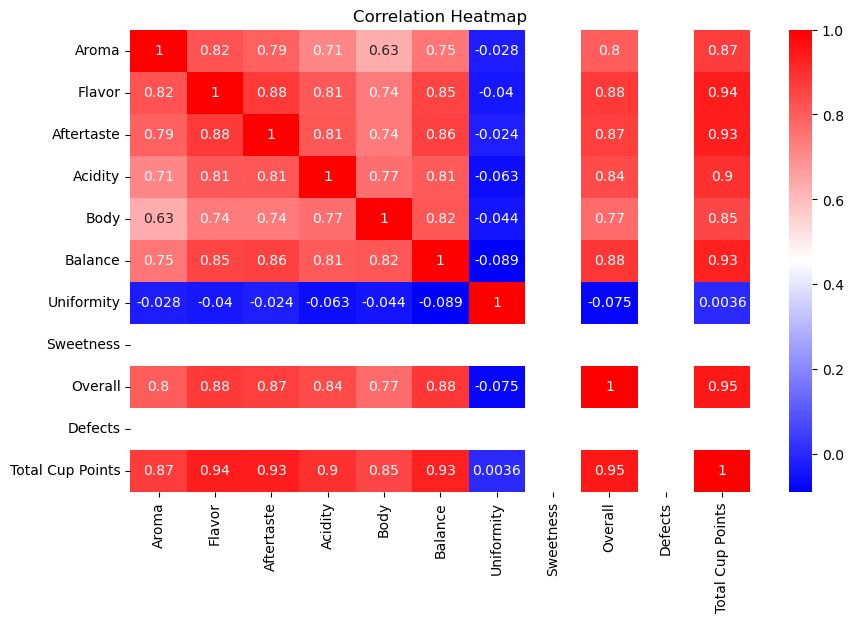

In [34]:
# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Compute the correlation matrix for selected variables in the dataset
variables = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points']
corr = original_dataset[variables].corr()

# Generate a heatmap to visualize the correlation between variables
sns.heatmap(corr, annot=True, cmap='bwr')  # 'annot=True' to display correlation coefficients

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

This heatmap shows how closely different coffee quality attributes are related to each other. The colors indicate the strength and type of correlation: blue for negative and red for positive correlations. 
<strong>High correlations between attributes like Flavor and Aftertaste or Flavor and Overall</strong>  suggest these qualities increase together, indicating they're closely linked in determining coffee's overall quality. Attributes like <strong>Uniformity show very little correlation</strong> with others, meaning they vary independently.

# (2)Data preparation

In [35]:
# Let's start cleaning data by dropping columns that are irrelevant to our analysis
analysis_dataset = original_dataset.drop(['Unnamed: 0', 'Farm Name', 'Mill', 'ICO Number', 'Company',
                                          'Producer', 'In-Country Partner', 'Lot Number', 'Owner',
                                          'Certification Body', 'Grading Date', 'Certification Address',
                                          'Certification Contact', 'Status', 'Harvest Year','Expiration','Altitude','ID', 'Country Frequency' ], axis=1)
# Print the shape of the dataset before dropping columns
print("Original dataset shape:", original_dataset.shape)

# Print the shape of the dataset after dropping columns
print("New dataset shape:", analysis_dataset.shape)


Original dataset shape: (207, 43)
New dataset shape: (207, 24)


In [36]:
# Calculate the number of missing values for each column in the analysis dataset
nan_values = analysis_dataset.isnull().sum()
nan_count = analysis_dataset.isnull().sum().sum()

# Display the number of missing values for each column
print(bold_text('Total of NaN values:'), nan_count)
nan_values


Total of NaN values: 13


Country of Origin        0
Region                   2
Number of Bags           0
Bag Weight               0
Variety                  6
Processing Method        5
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean Cup                0
Sweetness                0
Overall                  0
Defects                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Quakers                  0
Color                    0
Category Two Defects     0
Average Quality Score    0
dtype: int64

In [37]:
# Display the first few rows of dataset after dropped some columns 
analysis_dataset.head(3)

,Country of Origin,Region,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,...,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Average Quality Score
0,Colombia,"Piendamo,Cauca",1,35 kg,Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,...,10.0,8.58,0.0,89.33,11.8,0,0,green,3,8.814444
1,Taiwan,Chiayi,1,80 kg,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,...,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,8.621111
2,Laos,Laos Borofen Plateau,19,25 kg,Java,Semi Washed,8.33,8.42,8.08,8.17,...,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,8.602222


In [38]:
# Use label encoding to convert categorical variables to numerical for correlation analysis

analysis_dataset["Country of Origin"]=label_Encoder.fit_transform(analysis_dataset["Country of Origin"])
analysis_dataset["Region"]=label_Encoder.fit_transform(analysis_dataset["Region"])
analysis_dataset["Bag Weight"]=label_Encoder.fit_transform(analysis_dataset["Bag Weight"])
analysis_dataset["Variety"]=label_Encoder.fit_transform(analysis_dataset["Variety"])
analysis_dataset["Processing Method"]=label_Encoder.fit_transform(analysis_dataset["Processing Method"])
analysis_dataset["Color"]=label_Encoder.fit_transform(analysis_dataset["Color"])

In [39]:
#Checking if all the columns only contain numeric data
analysis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country of Origin      207 non-null    int64  
 1   Region                 207 non-null    int64  
 2   Number of Bags         207 non-null    int64  
 3   Bag Weight             207 non-null    int64  
 4   Variety                207 non-null    int64  
 5   Processing Method      207 non-null    int64  
 6   Aroma                  207 non-null    float64
 7   Flavor                 207 non-null    float64
 8   Aftertaste             207 non-null    float64
 9   Acidity                207 non-null    float64
 10  Body                   207 non-null    float64
 11  Balance                207 non-null    float64
 12  Uniformity             207 non-null    float64
 13  Clean Cup              207 non-null    float64
 14  Sweetness              207 non-null    float64
 15  Overal

In [40]:
# Display cleaned analysis data
analysis_dataset

,Country of Origin,Region,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,...,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Average Quality Score
0,1,76,1,22,4,1,8.58,8.50,8.42,8.58,...,10.0,8.58,0.0,89.33,11.8,0,0,4,3,8.814444
1,16,26,1,36,19,8,8.50,8.50,7.92,8.00,...,10.0,8.50,0.0,87.58,10.5,0,0,0,0,8.621111
2,9,52,19,15,20,7,8.33,8.42,8.08,8.17,...,10.0,8.33,0.0,87.42,10.4,0,0,11,2,8.602222
3,2,55,1,13,19,8,8.08,8.17,8.17,8.25,...,10.0,8.25,0.0,87.17,11.8,0,0,4,0,8.574444
4,1,77,2,14,29,3,8.33,8.33,8.08,8.25,...,10.0,8.25,0.0,87.08,11.6,0,2,10,2,8.564444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0,95,2240,32,25,4,7.17,7.17,6.92,7.17,...,10.0,7.08,0.0,80.08,11.4,0,0,4,4,7.788889
203,13,60,300,18,31,4,7.33,7.08,6.75,7.17,...,10.0,7.08,0.0,80.00,10.4,0,2,4,12,7.777778
204,9,11,343,32,8,8,7.25,7.17,7.08,7.00,...,10.0,7.00,0.0,79.67,11.6,0,9,4,11,7.740000
205,3,102,1,10,24,4,6.50,6.75,6.75,7.17,...,10.0,6.83,0.0,78.08,11.0,0,12,1,13,7.564444


# (3) Study the correlation

In [41]:
# Calculate the correlation matrix for the analysis dataset
correlation_matrix = analysis_dataset.corr()

points_correlations = correlation_matrix['Total Cup Points'].sort_values(ascending=False)
print(points_correlations)

Total Cup Points         1.000000
Average Quality Score    0.999989
Overall                  0.947217
Flavor                   0.939124
Aftertaste               0.934813
Balance                  0.929520
Acidity                  0.897057
Aroma                    0.868919
Body                     0.847216
Country of Origin        0.094932
Color                    0.067865
Uniformity               0.003556
Bag Weight              -0.012049
Processing Method       -0.044055
Moisture Percentage     -0.046476
Variety                 -0.049176
Category One Defects    -0.058156
Region                  -0.068869
Number of Bags          -0.243753
Category Two Defects    -0.314092
Quakers                 -0.320307
Clean Cup                     NaN
Sweetness                     NaN
Defects                       NaN
Name: Total Cup Points, dtype: float64


In this correlation study shows the relationships between 'Total Cup Points' and other variables in the dataset. <strong>Strong positive correlations</strong> are observed with features like 'Average Quality Score', 'Overall', 'Flavor', 'Aftertaste', 'Balance', 'Acidity', 'Aroma', and 'Body', indicating that higher values in these features tend to coincide with higher 'Total Cup Points'.

<strong>Moderately positive correlations</strong> is found with 'Country of Origin', while <strong>weak positive correlations</strong>  are seen with variables such as 'Color', 'Uniformity', and 'Bag Weight'. Conversely, <strong>a strong negative correlation</strong> is evident with 'Quakers', suggesting that higher 'Quakers' values are associated with lower 'Total Cup Points'.

However, 'Clean Cup', 'Sweetness', and 'Defects' show NaN correlations, implying potential issues with missing values, low variability, or data type mismatches even after cleaning the data and double checking analysis data. 

# (4) Spliting the data

The 'Total Cup Points' in our dataset are the sum of nine features, including Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, and Sweetness. Since 'Flavor' has the strongest positive correlation with 'Total Cup Points' according to our analysis, we have chosen to focus on it for this portfolio. Moving forward, we'll be exploring how 'Flavor' is related to other features like 'Aftertaste', 'Balance', 'Acidity', 'Aroma', and 'Body', which also show strong correlations with 'Total Cup Points'.

In [42]:

# Features selected based on strong correlation excluding 'Flavor' itself
features = ['Aftertaste', 'Balance', 'Acidity', 'Aroma', 'Body']

# 'Flavor' as the target variable
X = analysis_dataset[features]
y = analysis_dataset['Flavor']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (5) Train a linear regression model

In [43]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.008087534643134045


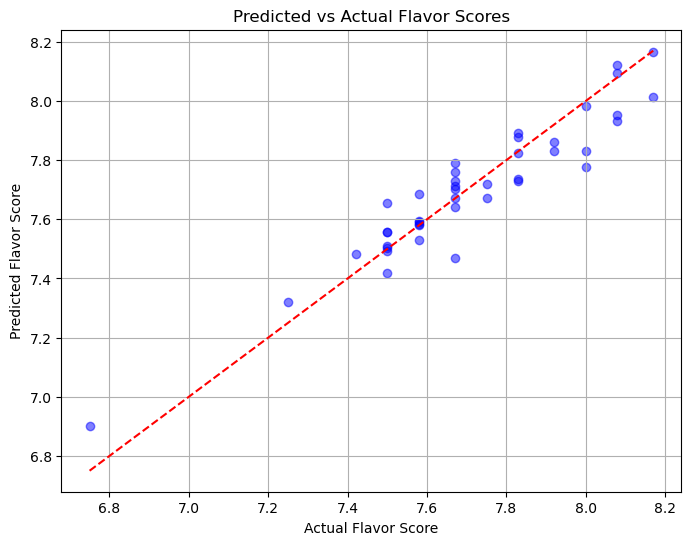

In [44]:

# Plotting the predicted vs actual flavor scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Flavor Scores')
plt.xlabel('Actual Flavor Score')
plt.ylabel('Predicted Flavor Score')
plt.grid(True)
plt.show()


# Explaination of  the Linear Regression result:

In this analysis, a Linear Regression model was utilized to predict the 'Flavor' score of coffee, which reflects the composite taste attributes including sweetness, bitterness, and acidity. This model was calibrated using features that demonstrate a high correlation with 'Flavor', specifically 'Aftertaste', 'Balance', 'Acidity', 'Aroma', and 'Body'. These predictors were chosen for their strong empirical relationships with the coffee's flavor, with the objective of constructing an effective predictive tool.

The dataset was partitioned into training and testing segments, allocating 80% for training to build the model and 20% for testing to validate the model's accuracy. The performance of the model was quantified using the Mean Squared Error (MSE) metric, which measures the average of the squares of the errors—the average squared difference between the predicted values and what was actually observed.

The MSE achieved in this study was approximately 0.00887, reflecting a low rate of error in the model’s predictions. This suggests that the model is highly effective in forecasting the 'Flavor' score from the identified sensory attributes, indicating that it can reliably capture and reflect the nuances of coffee flavor. The robustness of the model suggests its potential utility in predicting coffee quality in similar datasets or under comparable analytical conditions.

# (6) Model Evaluation using Cross-Validation

In [45]:
# Features and target
features = ['Aftertaste', 'Balance', 'Acidity', 'Aroma', 'Body']
X = analysis_dataset[features]
y = analysis_dataset['Flavor']

# Create linear regression model
model = LinearRegression()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of the scores
mse_scores = -cv_scores  # Convert scores to positive as they are returned as negative by convention
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean MSE: {mean_mse:.4f}')
print(f'Standard Deviation of MSE: {std_mse:.4f}')


Mean MSE: 0.0130
Standard Deviation of MSE: 0.0041


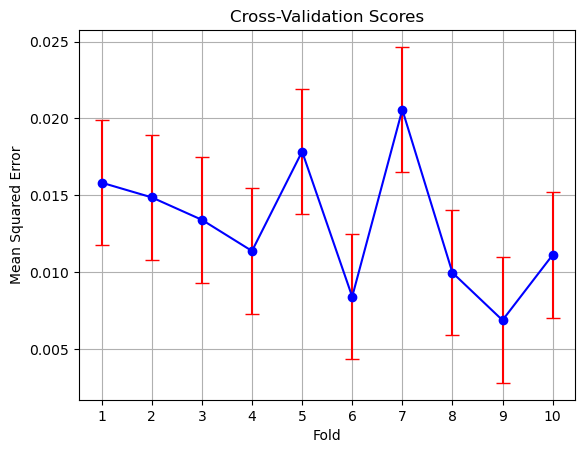

In [46]:
# Define the number of folds used in cross-validation
num_folds = 10

# Plotting mean test scores with error bars for standard deviations
plt.errorbar(range(1, num_folds + 1), mse_scores, yerr=std_mse, fmt='-o', color='b', ecolor='r', capsize=5)
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)
plt.show()


# The explanation of parameter tuning with cross-validation(CV)
The Mean Squared Error (MSE) and its Standard Deviation (SD) are essential metrics used in parameter tuning with cross-validation (CV) to assess the performance and stability of predictive models. In the context of this analysis, MSE measures the average squared difference between the predicted and actual 'Flavor' scores of coffee samples, providing insights into the accuracy of the model's predictions. The calculated MSE value of approximately 0.0130 indicates that, on average, the squared difference between the predicted and actual scores is 0.0130, suggesting that the model's predictions are generally close to the true values.

Furthermore, the Standard Deviation of MSE, computed to be approximately 0.0041, quantifies the variability in model performance across different folds of the cross-validation process. A lower standard deviation signifies more consistent performance, indicating that the model's predictions remain stable across various subsets of the data. These metrics play a crucial role in parameter tuning, guiding the selection of optimal model hyperparameters to improve predictive accuracy and generalization.

In summary, the MSE and its standard deviation provide valuable insights into the effectiveness of parameter tuning with cross-validation, helping to optimize model performance and enhance predictive capabilities for coffee flavor estimation."